Marcelo Goncalves

This project is about business.
the idea in this project is to predict the probability of a click is a fraud or not in the Chinese company by looking at features like ip address operating system, device type, time of click...

During the building of this project, we will doing the following steps:

1. Explore the dataset for anomalies and missing values and take corrective actions if necessary.

2. looking Which column has maximum number of unique values present among all the available columns

3. Use an appropriate technique to get rid of all the apps that are very rare (say which comprise of less                than 20% clicks) and plot the rest..** 

4. Using Pandas derive new features such as - 'day_of_week' , 'day_of_year' , 'month' , and 'hour' as                  float/int datatypes using the 'click_time' column . Add the newly derived columns in original dataset.**

5. Divide the data into training and testing subsets :
Train_data = 80% , Testing_data = 20%) and check the average download rates('is_attributed') for train and test data, scores should be comparable.**

6. Apply XGBoostClassifier with default parameters on training data and make first 10 prediction for Test data.          NOTE: Use y_pred = model.predict_proba(X_test) since we need probabilities to compute AUC.** 

7. On evaluating the predictions made by the model what is the AUC/ROC score with default hyperparameters.**

8. Compute feature importance score and name the top 5 features/columns .**

9. Apply BaggingClassifier with base_estimator LogisticRegression and compute AUC/ROC score.

10.  On the basis of AUC/ROC score which one will you choose from BaggingClassifier and XGBoostClassifier and              why?What does AUC/ROC score signifies?

11.  What is the accuracy for BaggingClassifier and XGBoostClassifier?()

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
%matplotlib inline

In [2]:
data=pd.read_csv("C:\\Users\\marce\\OneDrive\\Ambiente de Trabalho\\DataScience\\Tree\\talking_data.csv")

# Explore the dataset for anomalies and missing values and take corrective actions if necessary.*

In [3]:
print(data.shape)
print (data.columns)
data.info() 
data.describe()

(100000, 8)
Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000



As we can see in the information, we have 6 numerical variables and 2 categorical. Also 100000 rows and 8 column


In [4]:
# Looking for missing value
print (data.isnull().sum())


ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64


 we have  99773 missing value in attributed_time .

In [3]:
# les't drop the column attributed_time by creating a new variable called data1

data1=data.drop('attributed_time',axis=1)
print (data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ip             100000 non-null  int64 
 1   app            100000 non-null  int64 
 2   device         100000 non-null  int64 
 3   os             100000 non-null  int64 
 4   channel        100000 non-null  int64 
 5   click_time     100000 non-null  object
 6   is_attributed  100000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 5.3+ MB
None


Now we do not have the colum attributed_time

In [6]:
data1 # by looking the data, we can see that, we have no NaN value anymore.

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0
...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,0


In [7]:
# let examine the column click_time because it was the only one object type that we have as you can see in the data1.info()

print (data1['click_time'].unique())

['2017-11-07 09:30:38' '2017-11-07 13:40:27' '2017-11-07 18:05:24' ...
 '2017-11-09 04:21:28' '2017-11-07 09:33:14' '2017-11-09 13:25:41']


#  vizualize data

<AxesSubplot:xlabel='ip', ylabel='device'>

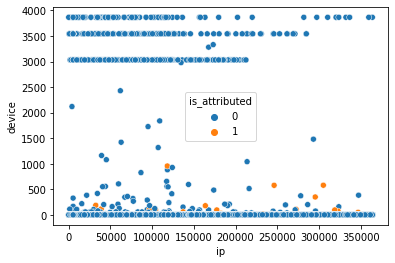

In [8]:
# so, now let's do some plot and see the relationship between variables
sns.scatterplot(x='ip',y='device',hue='is_attributed',data=data1)

In [9]:
sns.pairplot(data1, hue="is_attributed", diag_kind = 'hist', palette="husl")

Error in callback <function flush_figures at 0x000001D06B708D30> (for post_execute):


KeyboardInterrupt: 

In [10]:
sns.set_style("whitegrid");
sns.pairplot(data1, hue="is_attributed", size=3);
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001D06B708D30> (for post_execute):


KeyboardInterrupt: 

Graphs show us that, almost 90% of our data is 0, which means that we do not have fraud. (but we cannot affirm that. we do not have fraud because the data can be wrong) Also, we can see that, we do not have much relationship between variables because the data have the same result. (zero) this kind of observation can tell us that, probably our data is unbalanced

#  Correlation between variables 

In [ ]:
corr = data1.corr()
corr

In [ ]:
abs(corr['is_attributed'])[:5].sort_values(ascending = False)

As we can see in the correlation table, we do not have a very good correlation between variables, the only good relationship 
that we have is the relationship between DEVICE and OS. we can say that these two variables have strong correlations

# Heatmap to get more elivible result about corelation between variable

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

As we can see in the map, we have some correlation between variables almost zero. That's mean does variable do not have a 
 important impact in my analyzes
for example, the correlation between ip and os is almost zero, but I will keep this variable in my analyzes
because it has a good correlation with another variable

# Looking if the data is Balance or not by ploting the countplot

In [ ]:
print(data1.is_attributed.value_counts())



sns.countplot(x='is_attributed',data = data1, palette='Set3')

plt.title("is_attributed")

As we can see, the data is unbalanced because we have more than 90% of data as 0
we can say that The vast majority of the transactions will be in the “Not-Fraud” class and a very
small minority will be in the “Fraud” class.

# 2. Which column has maximum number of unique values present among all the available columns

In [ ]:
categorical_columns = ['ip','app','device','os','channel','click_time','is_attributed']
#Print frequency of categories
for col in categorical_columns:
    print (data1[col].value_counts())

The column that has maximum number of unique values present  is the click_time column. It has 80350 UV

# Use an appropriate technique to get rid of all the apps that are very rare (say which comprise of less than 20% clicks) and plot the rest..*

In [4]:
print (data1['app'].value_counts() )
app_count=data1['app'].value_counts()

3      18279
12     13198
2      11737
9       8992
15      8595
       ...  
407        1
145        1
271        1
398        1
92         1
Name: app, Length: 161, dtype: int64


In [5]:
# create a variable app_add to have all app that have > 20 of click.
#app_count[app_count<50].index
app_add=app_count[app_count>20].index
#app_count[app_count>50]
app_add

Int64Index([  3,  12,   2,   9,  15,  18,  14,   1,  13,   8,  21,  11,  26,
             23,   6,  64,   7,  20,  25,  28,  24,  27,  19,  10,  22,  17,
             29,  32,   5, 151,  36, 150,   4,  47,  56,  35,  55,  58,  94,
             37,  45,  93,  62, 183,  82,  83,  60],
           dtype='int64')

In [6]:
# create a variable app_remove to remove all app that have < 20 of click.
app_remove=app_count[app_count<20].index
app_remove

Int64Index([107,  65, 160,  72,  39,  38,  46, 110, 208,  44,
            ...
             91, 538, 474, 536, 216, 407, 145, 271, 398,  92],
           dtype='int64', length=114)

In [7]:
# create a list inicially empty and write a loop for, to add the new value (app_add) into it. 
clean_data=[]
for app in app_add:
    clean_data.append (data1.loc[data1['app']==app])
    

In [8]:
clean_data

[           ip  app  device  os  channel           click_time  is_attributed
 5       93663    3       1  17      115  2017-11-09 01:22:13              0
 9      143636    3       1  19      135  2017-11-08 12:35:26              0
 10      73839    3       1  22      489  2017-11-08 08:14:37              0
 11      34812    3       1  13      489  2017-11-07 05:03:14              0
 12     114809    3       1  22      205  2017-11-09 10:24:23              0
 ...       ...  ...     ...  ..      ...                  ...            ...
 99983   51379    3       1  41      135  2017-11-07 01:48:00              0
 99985   61500    3       1  10      280  2017-11-09 01:50:53              0
 99989   92730    3       1  19      379  2017-11-07 11:02:08              0
 99993  146258    3       1  13      280  2017-11-09 03:03:17              0
 99997   18839    3       1  13       19  2017-11-08 11:38:42              0
 
 [18279 rows x 7 columns],
            ip  app  device  os  channel       

In [9]:
#  create a final_data to have my clean_data. (data which has >20% of click app)


final_data=pd.concat(clean_data,axis=0)
print (final_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99546 entries, 5 to 98446
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ip             99546 non-null  int64 
 1   app            99546 non-null  int64 
 2   device         99546 non-null  int64 
 3   os             99546 non-null  int64 
 4   channel        99546 non-null  int64 
 5   click_time     99546 non-null  object
 6   is_attributed  99546 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 6.1+ MB
None


In [10]:
# plot the apps which have more then 20% clicks


# 4. By using Pandas derive new features such as - 'day_of_week' , 'day_of_year' , 'month' , and 'hour' as float/int datatypes using the 'click_time' column . Add the newly derived columns in original dataset

In [11]:
data['click_time'] # see what we have in the column click_time. and as we can see the dtpy is a object.

0        2017-11-07 09:30:38
1        2017-11-07 13:40:27
2        2017-11-07 18:05:24
3        2017-11-07 04:58:08
4        2017-11-09 09:00:09
                ...         
99995    2017-11-09 13:25:41
99996    2017-11-07 11:25:43
99997    2017-11-08 11:38:42
99998    2017-11-08 17:55:21
99999    2017-11-07 14:32:27
Name: click_time, Length: 100000, dtype: object

In [12]:
pd.to_datetime(final_data['click_time']) # using the datetime from pandas labrary, convert the object type into datetime 

5       2017-11-09 01:22:13
9       2017-11-08 12:35:26
10      2017-11-08 08:14:37
11      2017-11-07 05:03:14
12      2017-11-09 10:24:23
                ...        
72700   2017-11-08 05:03:45
81615   2017-11-09 10:24:44
83533   2017-11-09 01:26:50
84617   2017-11-09 01:28:08
98446   2017-11-09 11:22:50
Name: click_time, Length: 99546, dtype: datetime64[ns]

In [13]:
# create a variable call convert_final_data as datetime and add it into my final_data
final_data['convert_final_data'] = pd.to_datetime(final_data['click_time'])
print (final_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99546 entries, 5 to 98446
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ip                  99546 non-null  int64         
 1   app                 99546 non-null  int64         
 2   device              99546 non-null  int64         
 3   os                  99546 non-null  int64         
 4   channel             99546 non-null  int64         
 5   click_time          99546 non-null  object        
 6   is_attributed       99546 non-null  int64         
 7   convert_final_data  99546 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 6.8+ MB
None


In [14]:
# now we have the final_data_year let's use the lambda and apply function from pandas labrary to extrate the day, month and
# year in the numeical dtype.

final_data['final_data_month'] = final_data['convert_final_data'].apply(lambda x: x.month)
final_data['final_data_day'] = final_data['convert_final_data'].apply(lambda x: x.day)
final_data['final_data_year'] = final_data['convert_final_data'].apply(lambda x: x.year)
print(final_data)
final_data.info()

           ip  app  device  os  channel           click_time  is_attributed  \
5       93663    3       1  17      115  2017-11-09 01:22:13              0   
9      143636    3       1  19      135  2017-11-08 12:35:26              0   
10      73839    3       1  22      489  2017-11-08 08:14:37              0   
11      34812    3       1  13      489  2017-11-07 05:03:14              0   
12     114809    3       1  22      205  2017-11-09 10:24:23              0   
...       ...  ...     ...  ..      ...                  ...            ...   
72700  124946   60       1  13       21  2017-11-08 05:03:45              0   
81615  108852   60       1  10       21  2017-11-09 10:24:44              0   
83533   14442   60       1  37       21  2017-11-09 01:26:50              0   
84617  120740   60       1  10       21  2017-11-09 01:28:08              0   
98446  113524   60       1  34       21  2017-11-09 11:22:50              0   

       convert_final_data  final_data_month  final_

In [15]:
# As we can see, we have all data that we will use to do prediction the numerical type, so let's remove others columns
# that is not usifull in our analyses.

final_data = final_data.drop(['click_time','convert_final_data'],axis=1)

In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99546 entries, 5 to 98446
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ip                99546 non-null  int64
 1   app               99546 non-null  int64
 2   device            99546 non-null  int64
 3   os                99546 non-null  int64
 4   channel           99546 non-null  int64
 5   is_attributed     99546 non-null  int64
 6   final_data_month  99546 non-null  int64
 7   final_data_day    99546 non-null  int64
 8   final_data_year   99546 non-null  int64
dtypes: int64(9)
memory usage: 7.6 MB


# 5. Divide the data into training and testing subsets into 80:20 ratio(Train_data = 80% , Testing_data = 20%) and check the average download rates('is_attributed') for train and test data, scores should be comparable.**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing 


In [18]:
# let's create variable x and y where the y will be the dependent variable and x independent variable
x=final_data.drop(['is_attributed'], axis=1)
y=final_data['is_attributed']
X_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=10)

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(x_test)

In [20]:
print(X_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(79636, 8)
(79636,)
(19910, 8)
(19910,)


In [22]:
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import geometric_mean_score

print("Decision tree classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_tree):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_tree):.2f}")

Decision tree classifier performance:
Balanced accuracy: 0.71 - Geometric mean 0.65


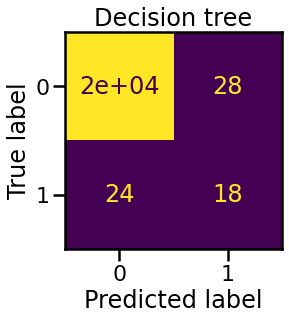

In [23]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

sns.set_context("poster")

disp = plot_confusion_matrix(tree, x_test, y_test, colorbar=False)
_ = disp.ax_.set_title("Decision tree")

#  Apply XGBoostClassifier with default parameters on training data and make first 10 prediction for Test data. NOTE: Use y_pred = model.predict_proba(X_test) since we need probabilities to compute AUC.**

In [24]:
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix



In [25]:
xgcl = xgb.XGBClassifier(n_estimators=10 ,criterion = 'gini', class_weight=None, max_depth = None, min_samples_leaf=1)
xgcl.fit(X_train, y_train)
y_pred = xgcl.predict(x_test)


[18:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [26]:
print("XGBClassifier classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred):.2f} - "
    
)
print("XGBClassifier classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred):.2f} - "
)

XGBClassifier classifier performance:
Balanced accuracy: 0.58 - 
XGBClassifier classifier performance:
Balanced accuracy: 0.58 - 


NameError: name 'balanced_bagging' is not defined

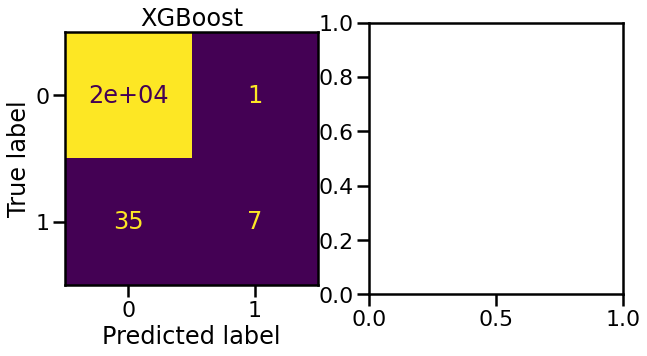

In [27]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
plot_confusion_matrix(xgcl, x_test, y_test, ax=axs[0], colorbar=False)
axs[0].set_title("XGBoost")

plot_confusion_matrix(balanced_bagging, x_test, y_test, ax=axs[1], colorbar=False)
axs[1].set_title("Balanced XGBoost")

fig.tight_layout()

In [28]:
# Random forest is another popular ensemble method and it is usually
# outperforming bagging. Here, we used a vanilla random forest and its balanced
# counterpart in which each bootstrap sample is balanced.

# %%
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=0)
brf = BalancedRandomForestClassifier(n_estimators=10, random_state=0)

rf.fit(X_train, y_train)
brf.fit(X_train, y_train)

y_pred_rf = rf.predict(x_test)
y_pred_brf = brf.predict(x_test)

In [29]:
print("Random Forest classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_rf):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_rf):.2f}"
)
print("Balanced Random Forest classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_brf):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_brf):.2f}")

Random Forest classifier performance:
Balanced accuracy: 0.56 - Geometric mean 0.34
Balanced Random Forest classifier performance:
Balanced accuracy: 0.89 - Geometric mean 0.89


In [30]:
xgcl = xgb.XGBClassifier(n_estimators=10 ,criterion = 'gini', class_weight=None, max_depth = None, min_samples_leaf=1)
xgcl.fit(X_train, y_train)
y_pred = xgcl.predict_proba(x_test)

[18:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [31]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10, centers=3, n_features=2,random_state=0)

# ===================

xgcl.fit(X, y) # traing data

#=================

for i in range(10):
    print(X[i], y_pred[i]) # prediction for the 10 first element 
  

[18:10:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, min_samples_leaf, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:10:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1.12031365 5.75806083] [0.97740114 0.02259888]
[1.7373078  4.42546234] [0.97740114 0.02259888]
[2.36833522 0.04356792] [0.97740114 0.02259888]
[0.87305123 4.71438583] [0.97740114 0.02259888]
[-0.66246781  2.17571724] [0.44066435 0.55933565]
[0.74285061 1.46351659] 

# On evaluating the predictions made by the model what is the AUC/ROC score with default hyperparameters

In [32]:
from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(xgcl, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Mean cross-validation score: nan
Accuracy: nan% (nan%)


# 8. Compute feature importance score and name the top 5 features/columns 

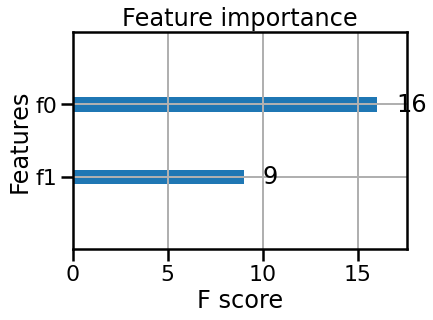

In [33]:
import xgboost
# Plot the top 7 features
xgboost.plot_importance(xgcl, max_num_features=5)
# Show the plot
plt.show()

In [34]:
test_prob = rf.predict_proba(x_test)
print(test_prob[:10])

[[1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]]


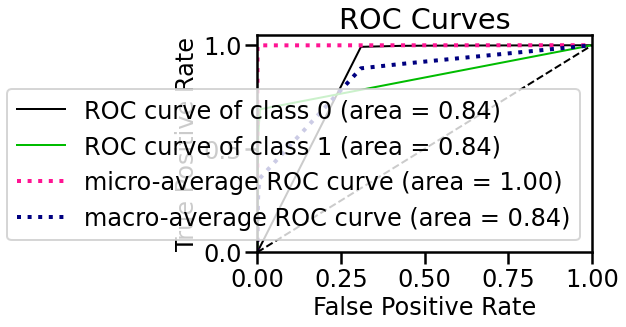

In [58]:

import scikitplot as skp

y_predb=rf.predict_proba(x_test)
skp.metrics.plot_roc_curve(y_test,y_predb) #(actual/orginal labels, predicted labels)
plt.show()

In [38]:
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.003 seconds


In [41]:
#feature_names=final_data.columns
feature_names=(['ip', 'app', 'device', 'os', 'channel', 'is_attributed',
       'final_data_month', 'final_data_day', 'final_data_year'])

In [42]:
import pandas as pd
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

ValueError: Length of passed values is 8, index implies 9.

The XGBoost  model tells us that the ip is the most important feature of the others

In [44]:

from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rf, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 2.368 seconds


ValueError: Length of passed values is 8, index implies 9.

NameError: name 'forest_importances' is not defined

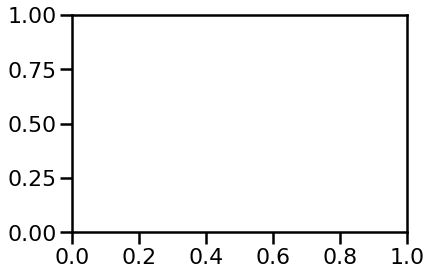

In [45]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Feature: 0, Score: 0.42202
Feature: 1, Score: 0.16064
Feature: 2, Score: 0.15167
Feature: 3, Score: 0.13058
Feature: 4, Score: 0.08115


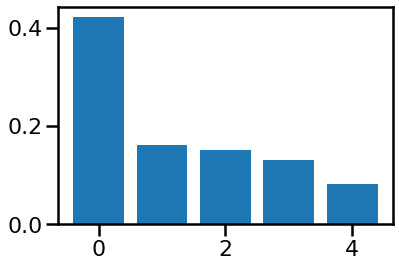

In [57]:
# Random Forest classifier feature importance
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

importance = rf.feature_importances_
importance.sort()
importance = importance[::-1]
importance = importance[:5]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
importance[:5]

In [ ]:
# XGBoost classifier feature importance
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot

importance = xgcl.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Apply BaggingClassifier with base_estimator LogisticRegression and compute AUC/ROC score.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
#====================================

pipeline = make_pipeline(StandardScaler(), 
                        LogisticRegression(random_state=1))
#=========================================

bagging = BaggingClassifier(base_estimator=pipeline, random_state=0)
balanced_bagging = BalancedBaggingClassifier(base_estimator=pipeline, random_state=0)

bagging.fit(X_train, y_train)
balanced_bagging.fit(X_train, y_train)

y_pred_bc = bagging.predict(x_test)
y_pred_bbc = balanced_bagging.predict(x_test)

In [ ]:
print("Bagging classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_bc):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_bc):.2f}"
)
print("Balanced Bagging classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_bbc):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_bbc):.2f}"
)


# On the basis of AUC/ROC score which one will you choose from BaggingClassifier and XGBoostClassifier and why?What does AUC/ROC score signifies?

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
scores = cross_val_score(xgcl, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

print("Accuracy for XGBoostClassifier: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))


#==========================================
scores1 = cross_val_score(bagging, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores1.mean())

print("Accuracy for BaggingClassifier : %.2f%% (%.2f%%)" % (scores1.mean()*100, scores1.std()*100))


# On the basis of AUC/ROC score which one will you choose from BaggingClassifier and XGBoostClassifier and why?What does AUC/ROC score signifies?

If I look at the result for my AUC/ROC in BaggingClassifier and XGBossClassifier, the result that I got is approximately the same, and I can not take a good conclusion about with one I should consider better because my data was unbalanced and for this reason, my score is approximately one. As we can see, the accuracy is 99.80% for XgBoost and 99.81 for Bagging. This is a really good prediction, but we should not consider it before doing more research on data processing like, for example, using method enough to improve data unbalance or training data with less sample

# What is the accuracy for BaggingClassifier and XGBoostClassifier?()

The accuracy for XgBoost is 99.80% and for Bagging is 99.81 